<hr style="border:1px solid #FEC60D"> </hr>
<center><h1 style="color:#173F8A;"> FUNDAMENTOS MATEMATICOS PARA INTELIGENCIA ARTIFICIAL</h1></center> 
<center><h1 style="color:#173F8A;"> IMT 3850, 2022 </h1></center>
<hr style="border:1px solid #FEC60D"> </hr>
<center><h3 style="color:#0176DE;text-align:right;"> Profesor. Manuel A. Sanchez<br></h3></center>
<h3 style="color:#03122E;text-align:right;"> Magister en Inteligencia Artificial - MIA <br> Instituto de Ingenieria Matematica y Computacional - IMC<br>  Pontificia Universidad Catolica de Chile<br>   </h3>




<!-- Palette colors UC:
Primaria: 
celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 
Secundaria
gris oscuro: #707070
-->

<hr style="border:2px solid #03122E"> </hr>
<center><h1 style="color:#173F8A;"> Probabilidades - clase 6</h1></center> 
<hr style="border:2px solid #03122E"> </hr>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Quicksort Algorithm

In [58]:
def Quicksort(Sinput):
    S = Sinput.copy()
    if len(S) == 1 or not S:
        return S
    else:
        # choose pivot
        ix = np.random.choice(range(0, len(S)))
        x = S[ix]
        S1 = []
        S2 = []
        S.remove(x)
        for item in S:
            if item<x:
                S1.append(item)
            else:
                S2.append(item)
        S1 = Quicksort(S1)
        S2 = Quicksort(S2)
        
        return S1+[x]+S2

In [59]:
S = np.random.rand(10).tolist()

In [60]:
Quicksort(S)

[0.015715020441555816,
 0.20401681049348386,
 0.49004018431289675,
 0.503258761058029,
 0.5276942970424923,
 0.6773067795600453,
 0.7097626423566896,
 0.8177343627401334,
 0.8242849197097689,
 0.8749406406579776]

In [68]:
def Quicksort_count_comparison(Sinput):
    S = Sinput.copy()
    if len(S) == 1 or not S:
        return S, 0
    else:
        # choose pivot
        ix = np.random.choice(range(0, len(S)))
        x = S[ix]
        S1 = []
        S2 = []
        S.remove(x)
        for item in S:
            if item<x:
                S1.append(item)
            else:
                S2.append(item)
        count = len(S)
        S1, count1 = Quicksort_count_comparison(S1)
        S2, count2 = Quicksort_count_comparison(S2)
        count += count1+count2
        return S1+[x]+S2, count

In [76]:
S = np.random.rand(10).tolist()

In [77]:
Ssorted, count_comparisons = Quicksort_count_comparison(S)
print(count_comparisons)

23


In [105]:
n = [30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
cc = []
N = 100
for ni in n:
    cc_i =0
    for j in range(N):
        S = np.random.rand(ni).tolist()
        Ssorted, count_comparisons_j = Quicksort_count_comparison(S)
        cc_i += count_comparisons_j
    cc.append(cc_i/N)

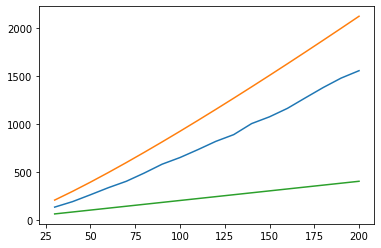

In [107]:
plt.plot(n, cc)
plt.plot(n, 2*np.asarray(n)*np.log(np.asarray(n)), 'C01')
plt.plot(n, 2*np.asarray(n), 'C02')
plt.show()

# Randomized Median Algorithm

In [326]:
def RandomizedMedianAlgorithm(Sinput):
    S = Sinput.copy()
    n = len(S)
    n34 = n**(3/4)
    n12 = np.sqrt(n)
    print(n, n34, n12)
    n1 = int(np.ceil(n34))

    R = sample(S, n1)
    print("len(R):", len(R))
    R = Quicksort(R)
    #print(R)
    di = int(np.floor(0.5*n34-n12))
    ui = int(np.ceil(0.5*n34+n12)-1)
    print("di:", di, "ui:", ui)
    d = R[di]
    u = R[ui]
    print("d:", d, "u:",u)
    C = []
    elld = 0
    ellu = 0
    for x in S:
        if x<d:
            elld += 1
        elif x>u:
            ellu += 1
        else:
            C.append(x)
    print("elld:", elld)
    print("ellu:", ellu)
    print("|C|: ", len(C), 4*n34)
    if elld>n/2 or ellu>n/2:
        return False
    if len(C) <= 4*n34:
        C = Quicksort(C)
        m = int(np.floor(n/2)) - elld   # or -1 in python
        return C[m]
    else:
        return False

In [327]:
from random import sample
NS = 21
S = np.random.rand(NS).tolist()

print(len(S))
Ssorted = Quicksort(S)
print(Ssorted[int((NS-1)/2)])
#S = [0,2,5,1,4,7,9,6,8,11,15,13,12,14, 18, 19,20, 16, 17]


21
0.47444469180590876


In [330]:

answer = True
iter = 0
NS = 201
#S = np.random.rand(NS).tolist()
S = np.arange(NS).tolist()
while answer is not False and iter<1000:
    
    
    answer = RandomizedMedianAlgorithm(S)
    print("answer:", answer)
    iter += 1


201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 50 u: 155
elld: 50
ellu: 45
|C|:  106 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 52 u: 149
elld: 52
ellu: 51
|C|:  98 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 45 u: 145
elld: 45
ellu: 55
|C|:  101 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 40 u: 164
elld: 40
ellu: 36
|C|:  125 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 32 u: 153
elld: 32
ellu: 47
|C|:  122 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 53 u: 139
elld: 53
ellu: 61
|C|:  87 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 59 u: 141
elld: 59
ellu: 59
|C|:  83 213.52908270791866
answer: 100
201 53.382270676979665 14.1774

201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 54 u: 151
elld: 54
ellu: 49
|C|:  98 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 39 u: 159
elld: 39
ellu: 41
|C|:  121 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 46 u: 137
elld: 46
ellu: 63
|C|:  92 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 58 u: 167
elld: 58
ellu: 33
|C|:  110 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 50 u: 153
elld: 50
ellu: 47
|C|:  104 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 30 u: 142
elld: 30
ellu: 58
|C|:  113 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 52 u: 160
elld: 52
ellu: 40
|C|:  109 213.52908270791866
answer: 100
201 53.382270676979665 14.177

di: 12 ui: 40
d: 49 u: 157
elld: 49
ellu: 43
|C|:  109 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 59 u: 146
elld: 59
ellu: 54
|C|:  88 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 47 u: 155
elld: 47
ellu: 45
|C|:  109 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 46 u: 166
elld: 46
ellu: 34
|C|:  121 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 47 u: 135
elld: 47
ellu: 65
|C|:  89 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 63 u: 140
elld: 63
ellu: 60
|C|:  78 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 47 u: 136
elld: 47
ellu: 64
|C|:  90 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 44 u: 148
elld

di: 12 ui: 40
d: 42 u: 156
elld: 42
ellu: 44
|C|:  115 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 61 u: 149
elld: 61
ellu: 51
|C|:  89 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 55 u: 164
elld: 55
ellu: 36
|C|:  110 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 44 u: 147
elld: 44
ellu: 53
|C|:  104 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 46 u: 145
elld: 46
ellu: 55
|C|:  100 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 39 u: 160
elld: 39
ellu: 40
|C|:  122 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 64 u: 147
elld: 64
ellu: 53
|C|:  84 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 35 u: 140
el

di: 12 ui: 40
d: 38 u: 138
elld: 38
ellu: 62
|C|:  101 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 30 u: 144
elld: 30
ellu: 56
|C|:  115 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 38 u: 161
elld: 38
ellu: 39
|C|:  124 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 42 u: 158
elld: 42
ellu: 42
|C|:  117 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 50 u: 145
elld: 50
ellu: 55
|C|:  96 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 49 u: 153
elld: 49
ellu: 47
|C|:  105 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 32 u: 149
elld: 32
ellu: 51
|C|:  118 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 47 u: 144
e

answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 57 u: 159
elld: 57
ellu: 41
|C|:  103 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 43 u: 134
elld: 43
ellu: 66
|C|:  92 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 36 u: 146
elld: 36
ellu: 54
|C|:  111 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 56 u: 166
elld: 56
ellu: 34
|C|:  111 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 47 u: 123
elld: 47
ellu: 77
|C|:  77 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 46 u: 147
elld: 46
ellu: 53
|C|:  102 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 30 u: 158
elld: 30
ellu: 42
|C|:  129 213.52908270791866
answer: 100
201 53.3822706769

answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 43 u: 171
elld: 43
ellu: 29
|C|:  129 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 41 u: 162
elld: 41
ellu: 38
|C|:  122 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 44 u: 159
elld: 44
ellu: 41
|C|:  116 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 52 u: 161
elld: 52
ellu: 39
|C|:  110 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 55 u: 154
elld: 55
ellu: 46
|C|:  100 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 59 u: 163
elld: 59
ellu: 37
|C|:  105 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 52 u: 144
elld: 52
ellu: 56
|C|:  93 213.52908270791866
answer: 100
201 53.382270676

answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 33 u: 143
elld: 33
ellu: 57
|C|:  111 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 28 u: 134
elld: 28
ellu: 66
|C|:  107 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 30 u: 131
elld: 30
ellu: 69
|C|:  102 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 49 u: 134
elld: 49
ellu: 66
|C|:  86 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 23 u: 135
elld: 23
ellu: 65
|C|:  113 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 62 u: 167
elld: 62
ellu: 33
|C|:  106 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 62 u: 146
elld: 62
ellu: 54
|C|:  85 213.52908270791866
answer: 100
201 53.3822706769

di: 12 ui: 40
d: 41 u: 149
elld: 41
ellu: 51
|C|:  109 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 40 u: 155
elld: 40
ellu: 45
|C|:  116 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 46 u: 131
elld: 46
ellu: 69
|C|:  86 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 53 u: 147
elld: 53
ellu: 53
|C|:  95 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 38 u: 152
elld: 38
ellu: 48
|C|:  115 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 46 u: 154
elld: 46
ellu: 46
|C|:  109 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 31 u: 125
elld: 31
ellu: 75
|C|:  95 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 68 u: 152
ell

answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 56 u: 139
elld: 56
ellu: 61
|C|:  84 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 37 u: 147
elld: 37
ellu: 53
|C|:  111 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 38 u: 149
elld: 38
ellu: 51
|C|:  112 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 42 u: 149
elld: 42
ellu: 51
|C|:  108 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 55 u: 165
elld: 55
ellu: 35
|C|:  111 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 56 u: 162
elld: 56
ellu: 38
|C|:  107 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 52 u: 143
elld: 52
ellu: 57
|C|:  92 213.52908270791866
answer: 100
201 53.3822706769

answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 40 u: 156
elld: 40
ellu: 44
|C|:  117 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 45 u: 159
elld: 45
ellu: 41
|C|:  115 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 48 u: 148
elld: 48
ellu: 52
|C|:  101 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 42 u: 155
elld: 42
ellu: 45
|C|:  114 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 40 u: 126
elld: 40
ellu: 74
|C|:  87 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 42 u: 145
elld: 42
ellu: 55
|C|:  104 213.52908270791866
answer: 100
201 53.382270676979665 14.177446878757825
len(R): 54
di: 12 ui: 40
d: 54 u: 160
elld: 54
ellu: 40
|C|:  107 213.52908270791866
answer: 100
201 53.382270676

In [331]:
print(1/NS**(1/4))

from statistics import median
print(median(S))


0.2655834362038789
100


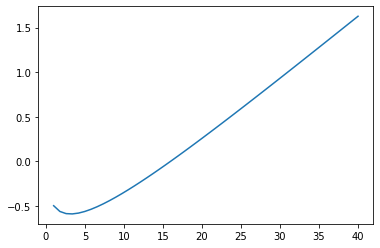

In [169]:
x = np.linspace(1, 40)
plt.plot(x, f(x))

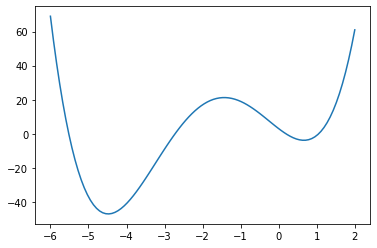

In [332]:
f = lambda x: x**4 + 7*x**3 + 5*x**2 - 17*x + 3
x = np.linspace(-6,2,100)
plt.plot(x, f(x))

## Ejemplo: 

\begin{equation}
f(x) = \frac{1}{2} x^\top 
A
x
-
b^\top x
\end{equation}
con 
\begin{equation}
A = \begin{pmatrix}
2 & 1 \\
1 & 20
\end{pmatrix}
, \qquad
b = \begin{pmatrix}
5 \\
3
\end{pmatrix}
\end{equation}

Tenemos
\begin{equation}
\nabla f = A x - b
\end{equation}

In [166]:
MAXITER = 1000
TOL = 1e-6
def graddescent_iter(f, gradf, x0):
    iter = 0
    xi = x0.copy()
    gamma_i = 0.01
    error = 1.
    while error>TOL and iter<MAXITER:
        xnew = xi- gamma_i*gradf(xi)
        error = np.linalg.norm(xnew-xi)
        print(error)
        xi = xnew
        iter += 1
    return xi, iter

In [171]:

def graddescent_iter_stepsize(f, gradf, x0, MAXITER = 1000, TOL = 1e-6):
    iter = 0
    xi = x0.copy()
    gamma_i = 1
    error = 1.
    while error>TOL and iter<MAXITER:
        xnew = xi- gamma_i*gradf(xi)
        if f(xnew)>f(xi):
            # decrease step size
            gamma_i = gamma_i/2
        else:
            error = np.linalg.norm(xnew-xi)
            print(error, gamma_i)
            xi = xnew
            gamma_i = gamma_i*2
            iter += 1
    return xi, iter

In [167]:
A = np.array([[2,1],[1,20]],dtype=np.float64)
b = np.array([5,3],dtype=np.float64)
def fex1(x):    
    return 0.5*np.dot(x,np.dot(A,x)) - np.dot(b,x)
def gradfex1(x):
    return np.dot(x,A) - b.T

In [168]:
x0 = np.array([-3,1], dtype=np.float64)
xstar, niter = graddescent_iter(fex1, gradfex1, x0)
print(xstar, niter)

0.1720465053408526
0.15049704316032267
0.13440010788686155
0.12245099675541407
0.11357751911259649
0.10692778766050295
0.10185083988531243
0.09786759095891971
0.09463660154678659
0.09192060823569698
0.08955779586506257
0.08743924696278244
0.08549228504233754
0.08366866807832653
0.0819364491101873
0.08027446860468415
0.07866867383731134
0.07710967961846373
0.0755911606379583
0.07410879579657238
0.07265957668225434
0.07124135530007188
0.06985254857731656
0.06849194541560408
0.06715858074026003
0.06585165328723648
0.06457047192851927
0.06331442061270484
0.06208293544555683
0.060875489686913836
0.0596915839096472
0.058530739524831815
0.05739249450234357
0.05627640052364461
0.05518202106921434
0.0541089301162929
0.05305671123550781
0.05202495694855265
0.05101326825705896
0.050021254284069915
0.04904853198990827
0.048094725937514245
0.04715946809098947
0.046242397636727633
0.0453431608201919
0.044461410793797264
0.04359680747292079
0.04274901739808096
0.04191771360199376
0.041102575480644526

In [172]:
x0 = np.array([-3,1], dtype=np.float64)
xstar, niter = graddescent_iter_stepsize(fex1, gradfex1, x0)
print(xstar, niter)

2.1505813167606567 0.125
1.3630517804727742 0.0625
1.100235376317623 0.125
1.1794640032525652 0.125
0.771544977113602 0.0625
0.5819527565220829 0.125
0.6520189384484049 0.125
0.4382758113967243 0.0625
0.3104832942503405 0.125
0.18151195127977177 0.0625
0.17106669103267913 0.125
0.1671359231341384 0.125
0.10169259354298682 0.0625
0.08902613855998344 0.125
0.09077785301085639 0.125
0.0572773578614388 0.0625
0.04666408635344362 0.125
0.049731455668332855 0.125
0.03240440524828638 0.0625
0.024655060533876966 0.125
0.027464380025856775 0.125
0.018399466295598774 0.0625
0.013138654206325049 0.125
0.015277668167855423 0.125
0.010478108794759413 0.0625
0.00706426134325234 0.125
0.0042763793355679635 0.0625
0.0037801381604435523 0.125
0.0038323876843400348 0.125
0.0024070615740811813 0.0625
0.0019794312633898224 0.125
0.00209719427938229 0.125
0.0013610509600837646 0.0625
0.0010446951055226722 0.125
0.0011570028623441382 0.125
0.000772476311580666 0.0625
0.0005560723643026106 0.125
0.0006430239

## Ejemplo: Regresion lineal

In [119]:
def loss_ls(theta,x,y):
    N = x.size
    X = np.zeros((N,2), dtype=np.float64)
    X[:,0] = np.ones(N)
    X[:,1] = x[:]
    return (1.0/N)*np.linalg.norm(X.dot(theta)-y)**2

def gradloss_ls(theta,x,y):
    N = x.size
    X = np.zeros((N,2), dtype=np.float64)
    X[:,0] = np.ones(N)
    X[:,1] = x[:]
    return (2.0/N)*X.T.dot(X.dot(theta)-y)

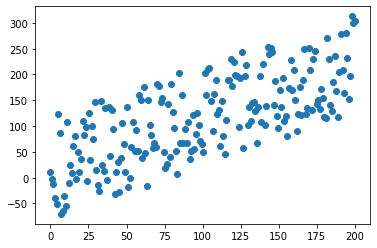

In [135]:
import random
import matplotlib.pyplot as plt
N = 200
x = np.linspace(0,N,N)
delta = N/2.0
b = 20
y = x + b*np.ones(N) + np.random.uniform(-1, 1,N) * delta
plt.scatter(x,y)

In [138]:
f2 = lambda theta: loss_ls(theta,x,y)
df2 = lambda theta: gradloss_ls(theta,x,y)
theta0 = np.array([1,1], dtype=np.float64)
thetastar, niter = graddescent_iter_stepsize(f2, df2, theta0, MAXITER = 200000)
print(thetastar, niter)

[17.34686895  0.99044964] 160267


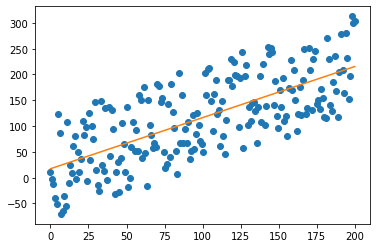

In [139]:
fig, ax = plt.subplots()
ax.scatter(x,y)
predictor = lambda x: thetastar[0] + thetastar[1]*x
ax.plot(x, predictor(x), 'C01')

## Descenso del gradiente estocastico con sklearn

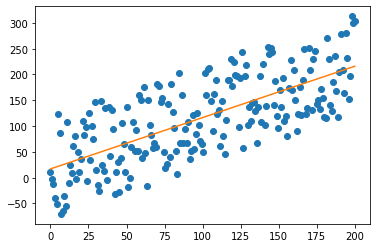

In [154]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X = np.reshape(x,(N,1))
n_samples, n_features = N, 1
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X, y)
yhat = reg.predict(X)
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.plot(x, yhat, 'C01')

## Funciones convexas

### Ejemplo 1: $f(x) = 3x^{2} - 5x + 2$

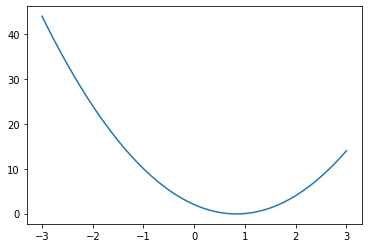

In [155]:
fcon1 = lambda x: 3*x**2-5*x+2
x = np.linspace(-3,3,100)
plt.plot(x,fcon1(x))

### Ejemplo 2: $ f(x) = x\log_2(x)$

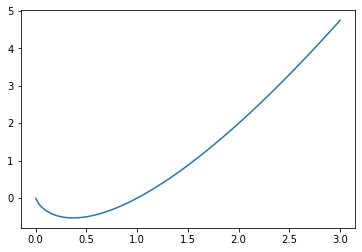

In [157]:
fcon2 = lambda x: x*np.log2(x)
x = np.linspace(0.001,3,100)
plt.plot(x,fcon2(x))

### Ejemplo 3: $f(x) = \ln(1+\exp(x))$

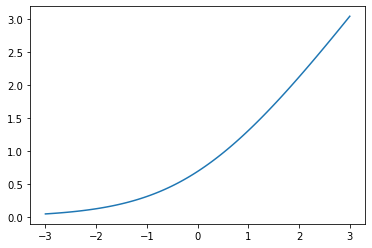

In [158]:
fcon3 = lambda x: np.log(1+np.exp(x))
x = np.linspace(-3,3,100)
plt.plot(x,fcon3(x))